Epoch 1/100
4/4 [==============================] - 1s 69ms/step - loss: 0.1534 - val_loss: 0.1120
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1275 - val_loss: 0.0882
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0985 - val_loss: 0.0649
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0719 - val_loss: 0.0432
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0457 - val_loss: 0.0253
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0269 - val_loss: 0.0145
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0177 - val_loss: 0.0149
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0187 - val_loss: 0.0155
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0180 - val_loss: 0.0118
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0148 - val_loss: 0.0103
Epoch 11/100
4/4 [=

C:\Users\jorge\miniconda3\envs\regresion_dl\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


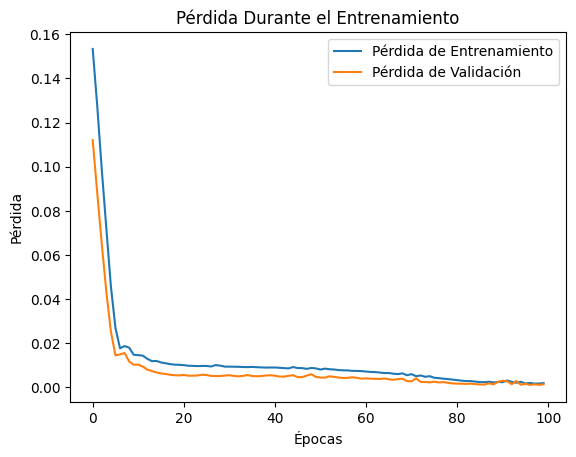

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Cargar las secuencias preprocesadas
X = np.load('data/X_sequences.npy')
y = np.load('data/y_sequences.npy')

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la estructura del modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Guardar el modelo entrenado
model.save('airline_passengers_lstm.h5')

# Graficar la pérdida durante el entrenamiento
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida Durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
